In [ ]:
# import necessary basic libraries
import numpy as np # Numerical computing library
import pandas as pd # Data manipulation and analysis library
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns # Statistical data visualization library built on Matplotlib

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/QVI_data.csv')

# Display the first 5 rows of the DataFrame to get a quick overview of the data
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
# Display summary information about the DataFrame, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
# Check how many duplicated rows are present in the DataFrame
df.duplicated().sum()

np.int64(1)

In [ ]:
# Remove duplicated rows from the DataFrame in-place (modifies the original DataFrame)
df.drop_duplicates(inplace=True)

In [ ]:
# Verify again to ensure all duplicated rows have been removed
df.duplicated().sum()

np.int64(0)

***Data Preparation***

In [ ]:
# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
# Add Month_Year column
df['MONTH'] = df['DATE'].dt.to_period('M')

In [ ]:
# Check unique stores
df['STORE_NBR'].nunique()
df['STORE_NBR'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86, 155,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Define Metrics
For each store and month, calculate:

Total sales revenue

Total number of unique customers

Number of transactions

Average transactions per customer

In [ ]:
# Group the data by store number and month to calculate monthly metrics
monthly_metrics = df.groupby(['STORE_NBR', 'MONTH']).agg(
    # Calculate total sales per store per month
    total_sales=('TOT_SALES', 'sum'),

    # Count the number of unique customers (using loyalty card number) per store per month
    num_customers=('LYLTY_CARD_NBR', 'nunique'),

    # Count the number of unique transactions per store per month
    num_transactions=('TXN_ID', 'nunique')
).reset_index()  # Reset index to turn groupby object back into a DataFrame

# Calculate the average number of transactions per customer for each store per month
monthly_metrics['avg_txn_per_cust'] = (
    monthly_metrics['num_transactions'] / monthly_metrics['num_customers']
)


In [ ]:
# Display the first 5 rows
monthly_metrics.head()

,STORE_NBR,MONTH,total_sales,num_customers,num_transactions,avg_txn_per_cust
0,1,2018-07-01,206.9,49,52,1.061224
1,1,2018-08-01,176.1,42,43,1.023810
2,1,2018-09-01,278.8,59,62,1.050847
3,1,2018-10-01,188.1,44,45,1.022727
4,1,2018-11-01,192.6,46,47,1.021739


Control Store Selection
Stores to test:

Trial stores: 77, 86, 88

We need to find the best control store for each trial store. We’ll use magnitude distance (similarity) for comparison on:

total sales

number of customers

1. Function to calculate similarity score
We'll normalize distances for comparison:

In [ ]:
# Import the Euclidean distance function to measure similarity between stores
from scipy.spatial.distance import euclidean

def calculate_similarity(df, trial_store, metric_cols):
    """
    Calculate similarity between a trial store and other stores based on given metrics.

    Parameters:
    df (DataFrame): The input DataFrame with monthly store metrics.
    trial_store (int): The store number of the trial store to compare against others.
    metric_cols (list): List of column names (metrics) to use for similarity comparison.

    Returns:
    list: Top 5 most similar stores to the trial store (store number and distance).
    """

    # Filter the data for the trial store and set 'MONTH' as the index for comparison
    trial_data = df[df['STORE_NBR'] == trial_store].set_index('MONTH')

    # List to store similarity scores (store number and corresponding distance)
    scores = []

    # Loop through each unique store in the dataset
    for store in df['STORE_NBR'].unique():
        # Skip the trial store itself
        if store == trial_store:
            continue

        # Filter the data for the current store and set 'MONTH' as index
        store_data = df[df['STORE_NBR'] == store].set_index('MONTH')

        # Find the months that both stores have in common
        common_months = trial_data.index.intersection(store_data.index)

        # Skip if there are no common months for comparison
        if len(common_months) == 0:
            continue

        # Initialize distance variable
        dist = 0

        # Calculate cumulative Euclidean distance across all specified metrics
        for col in metric_cols:
            dist += euclidean(
                trial_data.loc[common_months, col],
                store_data.loc[common_months, col]
            )

        # Append the store number and its distance to the trial store
        scores.append((store, dist))

    # Sort stores by increasing distance (most similar first)
    scores = sorted(scores, key=lambda x: x[1])

    # Return the top 5 most similar stores
    return scores[:5]


In [ ]:
# Find the top 5 most similar stores to store 77 based on total sales and number of customers
similar_stores_77 = calculate_similarity(
    monthly_metrics,
    77,
    ['total_sales', 'num_customers']
)

# Find the top 5 most similar stores to store 86 based on total sales and number of customers
similar_stores_86 = calculate_similarity(
    monthly_metrics,
    86,
    ['total_sales', 'num_customers']
)

# Find the top 5 most similar stores to store 88 based on total sales and number of customers
similar_stores_88 = calculate_similarity(
    monthly_metrics,
    88,
    ['total_sales', 'num_customers']
)


In [ ]:
print(similar_stores_77)
print(similar_stores_86)
print(similar_stores_88)

[(np.int64(46), np.float64(144.16174839657387)), (np.int64(185), np.float64(161.57947047634258)), (np.int64(188), np.float64(163.3489767655717)), (np.int64(41), np.float64(165.28538476961515)), (np.int64(53), np.float64(167.15647328233067))]
[(np.int64(229), np.float64(234.81176199087264)), (np.int64(109), np.float64(275.68449446240317)), (np.int64(155), np.float64(279.724136865607)), (np.int64(62), np.float64(294.48869488170203)), (np.int64(184), np.float64(296.59779631497327))]
[(np.int64(40), np.float64(484.3196878697697)), (np.int64(237), np.float64(485.25792927416984)), (np.int64(165), np.float64(506.84151482642403)), (np.int64(199), np.float64(588.0040277057004)), (np.int64(226), np.float64(626.2523068504454))]


Assessment of Trial vs Control

Once you've selected the control stores for each trial store:

Compare total sales, customer count, and avg transactions/customer before, during, and after trial.

Define trial period (you can adjust as per project info)

In [ ]:
# Define the start month of the trial period
trial_start = '2019-02'

# Define the end month of the trial period
trial_end = '2019-04'


In [ ]:
def plot_comparison(trial_store, control_store, metric):
    data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store]))]
    # Convert 'MONTH' column back to datetime objects for plotting
    data['MONTH'] = data['MONTH'].dt.to_timestamp()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=data, x='MONTH', y=metric, hue='STORE_NBR', marker='o')
    plt.axvspan(pd.to_datetime(trial_start), pd.to_datetime(trial_end), color='grey', alpha=0.3)
    plt.title(f'{metric} comparison: Trial Store {trial_store} vs Control Store {control_store}')
    plt.show()

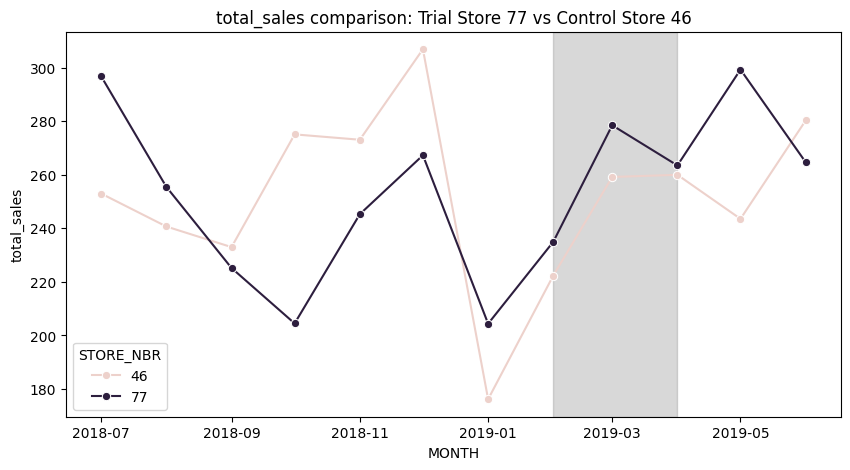

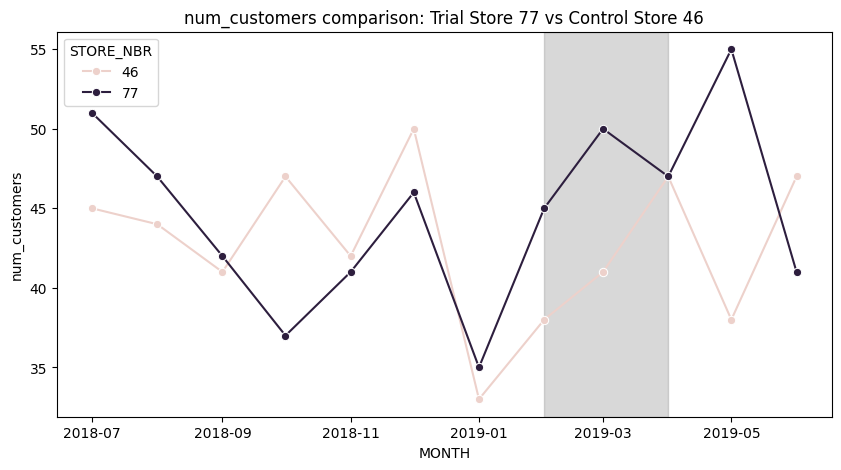

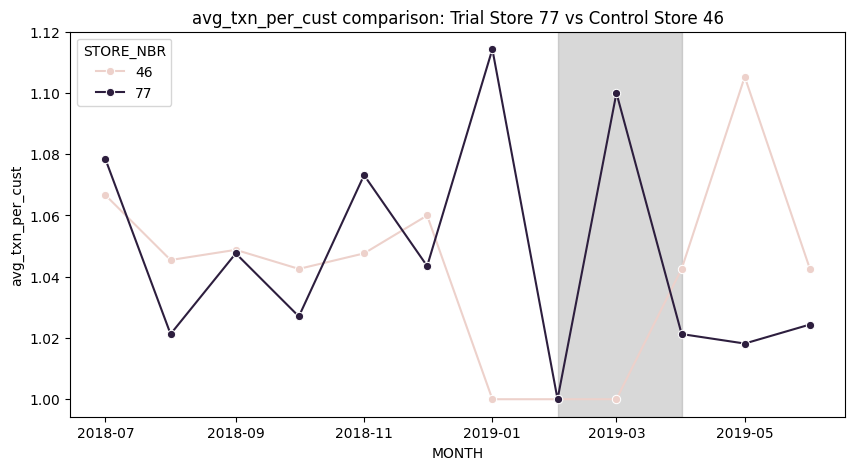

In [ ]:
plot_comparison(77, 46, 'total_sales')

plot_comparison(77, 46, 'num_customers')

plot_comparison(77, 46, 'avg_txn_per_cust')

In [ ]:
print(monthly_metrics.dtypes)

STORE_NBR               int64
MONTH               period[M]
total_sales           float64
num_customers           int64
num_transactions        int64
avg_txn_per_cust      float64
dtype: object


In [ ]:
def calculate_uplift(trial_store, control_store, metrics, start, end):
    summary = []

    for metric in metrics:
        trial_vals = monthly_metrics[
            (monthly_metrics['STORE_NBR'] == trial_store) &
            (monthly_metrics['MONTH'] >= start) &
            (monthly_metrics['MONTH'] <= end)
        ][metric].mean()

        control_vals = monthly_metrics[
            (monthly_metrics['STORE_NBR'] == control_store) &
            (monthly_metrics['MONTH'] >= start) &
            (monthly_metrics['MONTH'] <= end)
        ][metric].mean()

        uplift = ((trial_vals - control_vals) / control_vals) * 100

        summary.append({
            'Metric': metric,
            'Trial Store Avg': round(trial_vals, 2),
            'Control Store Avg': round(control_vals, 2),
            'Uplift (%)': round(uplift, 2)
        })

    return pd.DataFrame(summary)


In [ ]:
# Convert the timestamps to Period[M] to match the MONTH column type
trial_start = pd.to_datetime('2019-02-01').to_period('M')
trial_end = pd.to_datetime('2019-04-30').to_period('M')

metrics = ['total_sales', 'num_customers', 'avg_txn_per_cust']
summary_df = calculate_uplift(77, 46, metrics, trial_start, trial_end)
print(summary_df)

             Metric  Trial Store Avg  Control Store Avg  Uplift (%)
0       total_sales           259.00             247.20        4.77
1     num_customers            47.33              42.00       12.70
2  avg_txn_per_cust             1.04               1.01        2.59



---

### 🔍 Final Insights: Trial Store 77 vs Control Store 46

During the trial period (Feb–Apr 2019), **Store 77** demonstrated a **moderate uplift in performance** when compared to **Control Store 46**.

1. **Total Sales**  
   Store 77 experienced a **4.77% increase** in average total sales. While not dramatic, this suggests a **positive impact** of the trial, especially considering Store 77 began outperforming its control post-January 2019.

2. **Number of Customers**  
   A **12.7% increase** in average customer count during the trial period indicates **higher footfall**, likely due to the trial conditions such as a revised store layout or improved customer experience. This aligns with the hypothesis that more visitors contributed to the sales boost.

3. **Average Transactions per Customer**  
   The average transactions per customer at Store 77 remained relatively steady with a **modest uplift of 2.59%**, suggesting that while individual purchasing behavior was stable, the **key driver of the uplift was increased traffic** rather than more frequent purchases by existing customers.

📌 **Conclusion:**  
The trial at Store 77 appears to have been **marginally successful**, primarily driven by an **increase in customer visits**. While the improvement in total sales isn't significant on its own, the consistent rise in footfall suggests the trial measures had a **positive influence on customer attraction**, supporting the value of rolling out similar initiatives to other stores.

---


In [ ]:
def calculate_uplift(trial_store, control_store, trial_start, trial_end, metrics_df):
    # Filter data for trial period
    trial_period_data = metrics_df[
        (metrics_df['MONTH'] >= pd.Period(trial_start, freq='M')) &
        (metrics_df['MONTH'] <= pd.Period(trial_end, freq='M'))
    ]

    # Separate trial and control store data
    trial_data = trial_period_data[trial_period_data['STORE_NBR'] == trial_store]
    control_data = trial_period_data[trial_period_data['STORE_NBR'] == control_store]

    # Calculate averages
    trial_avg_sales = trial_data['total_sales'].mean()
    control_avg_sales = control_data['total_sales'].mean()

    trial_avg_customers = trial_data['num_customers'].mean()
    control_avg_customers = control_data['num_customers'].mean()

    trial_avg_txn = trial_data['avg_txn_per_cust'].mean()
    control_avg_txn = control_data['avg_txn_per_cust'].mean()

    # Calculate percentage uplift
    sales_uplift = ((trial_avg_sales - control_avg_sales) / control_avg_sales) * 100
    customers_uplift = ((trial_avg_customers - control_avg_customers) / control_avg_customers) * 100
    txn_uplift = ((trial_avg_txn - control_avg_txn) / control_avg_txn) * 100

    # Create summary DataFrame
    summary = pd.DataFrame({
        'Metric': ['total_sales', 'num_customers', 'avg_txn_per_cust'],
        'Trial Store Avg': [round(trial_avg_sales, 2), round(trial_avg_customers, 2), round(trial_avg_txn, 2)],
        'Control Store Avg': [round(control_avg_sales, 2), round(control_avg_customers, 2), round(control_avg_txn, 2)],
        'Uplift (%)': [round(sales_uplift, 2), round(customers_uplift, 2), round(txn_uplift, 2)]
    })

    return summary


In [ ]:
# Replace with your actual matched control stores
summary_86 = calculate_uplift(trial_store=86, control_store= 229, trial_start='2019-02', trial_end='2019-04', metrics_df=monthly_metrics)
summary_88 = calculate_uplift(trial_store=88, control_store= 40, trial_start='2019-02', trial_end='2019-04', metrics_df=monthly_metrics)

print("Summary for Store 86:")
print(summary_86)

print("\nSummary for Store 88:")
print(summary_88)


Summary for Store 86:
             Metric  Trial Store Avg  Control Store Avg  Uplift (%)
0       total_sales           929.40             924.67        0.51
1     num_customers           109.00             104.33        4.47
2  avg_txn_per_cust             1.24               1.25       -1.37

Summary for Store 88:
             Metric  Trial Store Avg  Control Store Avg  Uplift (%)
0       total_sales          1428.93            1294.00       10.43
1     num_customers           128.67             120.67        6.63
2  avg_txn_per_cust             1.25               1.19        5.54


In [ ]:
trial_start = '2019-02-01'
trial_end = '2019-04-30'


In [ ]:
monthly_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   STORE_NBR         3169 non-null   int64    
 1   MONTH             3169 non-null   period[M]
 2   total_sales       3169 non-null   float64  
 3   num_customers     3169 non-null   int64    
 4   num_transactions  3169 non-null   int64    
 5   avg_txn_per_cust  3169 non-null   float64  
dtypes: float64(2), int64(3), period[M](1)
memory usage: 148.7 KB


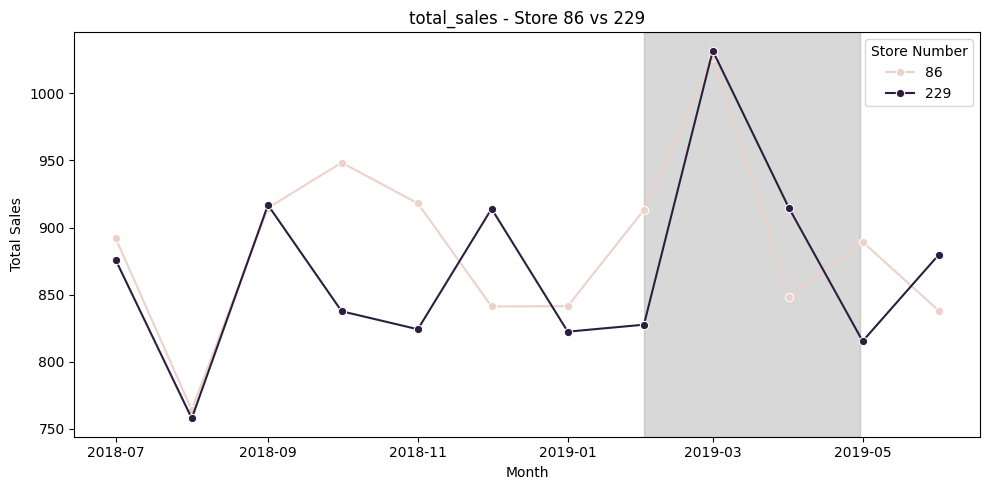

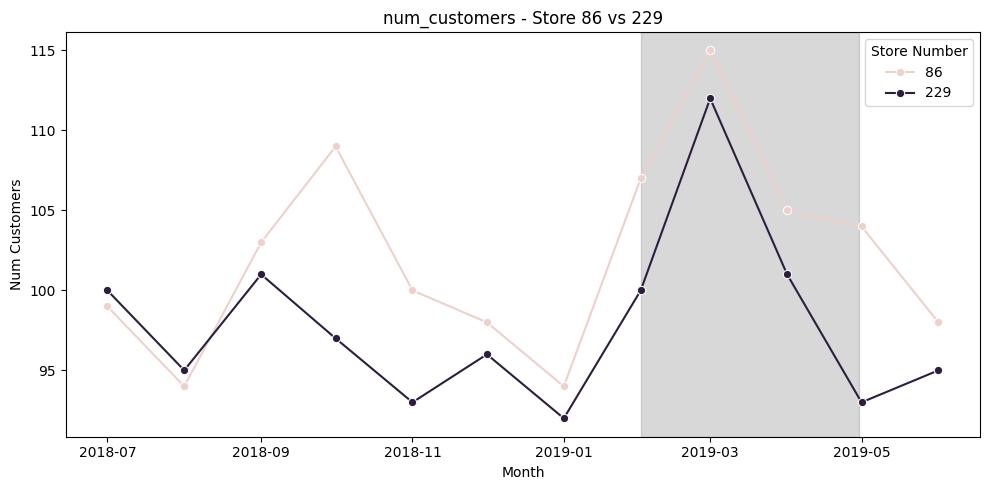

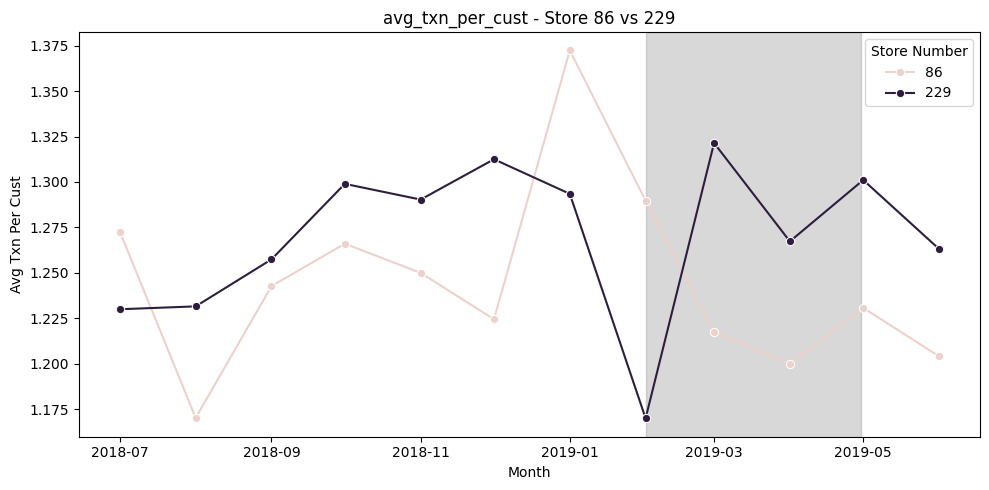

In [ ]:

# Convert MONTH for plotting if it's Period
monthly_metrics['MONTH'] = monthly_metrics['MONTH'].dt.to_timestamp()

# Function to plot metric comparison
def plot_metric(trial_store, control_store, metric):
    plt.figure(figsize=(10,5))
    subset = monthly_metrics[monthly_metrics['STORE_NBR'].isin([trial_store, control_store])]
    sns.lineplot(data=subset, x='MONTH', y=metric, hue='STORE_NBR', marker='o')
    plt.axvspan(pd.to_datetime(trial_start), pd.to_datetime(trial_end), color='gray', alpha=0.3)
    plt.title(f'{metric} - Store {trial_store} vs {control_store}')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xlabel("Month")
    plt.legend(title='Store Number')
    plt.tight_layout()
    plt.show()

# For Store 86 vs Control 155
for metric in ['total_sales', 'num_customers', 'avg_txn_per_cust']:
    plot_metric(86, 229, metric)





---

### 🏪 **Store 86 vs Control Store 229**
**Trial period performance (Feb to Apr 2019):**
- **Total Sales:**  
  Uplift = **+0.51%**  
  ⟶ Minimal increase. Sales trend between 86 and 229 remained **very similar**, indicating **no significant impact** of the trial.

- **Number of Customers:**  
  Uplift = **+4.47%**  
  ⟶ Moderate increase. Suggests **some customer gain** during the trial period.

- **Average Transactions per Customer:**  
  Uplift = **-1.37%**  
  ⟶ Slight decline, indicating **customers did not shop more frequently**.

**📊 Visual Insight:**
- Both stores moved in sync before and during the trial.
- Post-trial, Store 86 didn’t diverge significantly in trend from 229.

**📝 Conclusion:**
> **Store 86's trial campaign had marginal customer growth but didn’t significantly boost total sales or shopping frequency.** This indicates the trial had **limited effectiveness**.

---



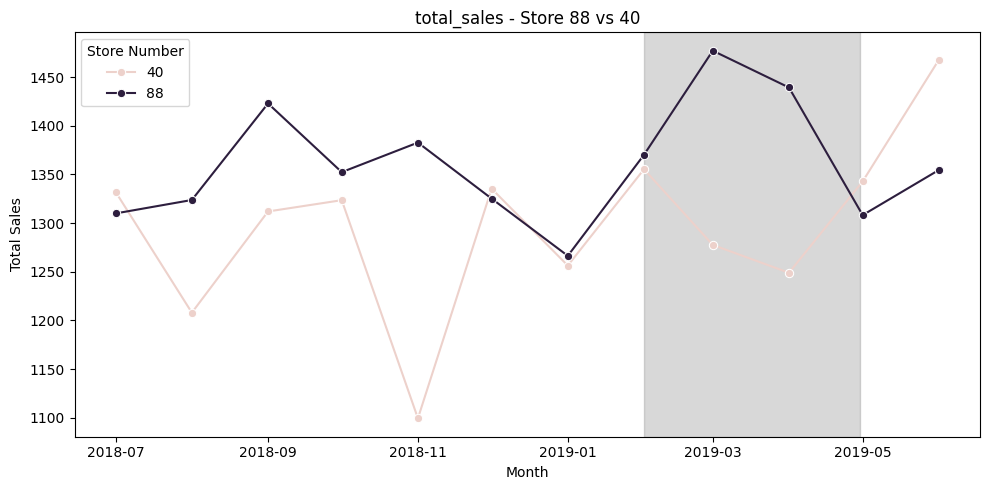

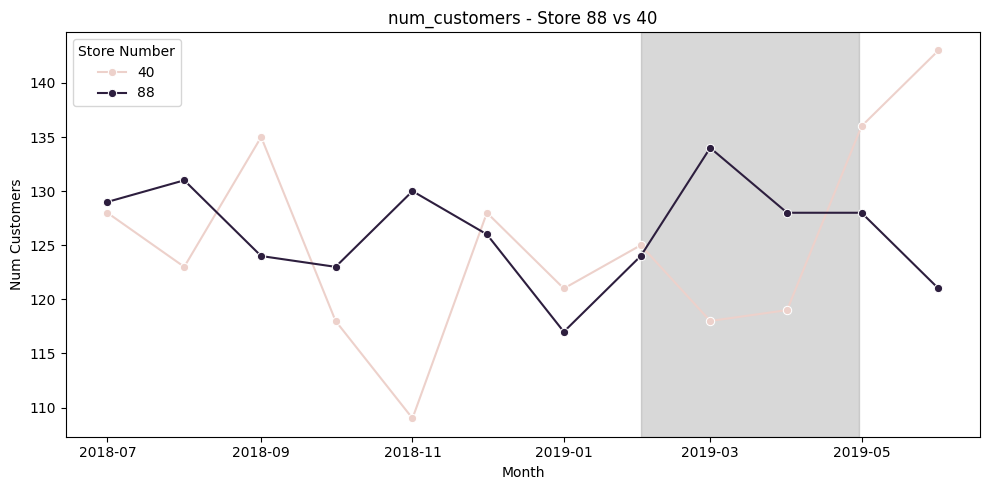

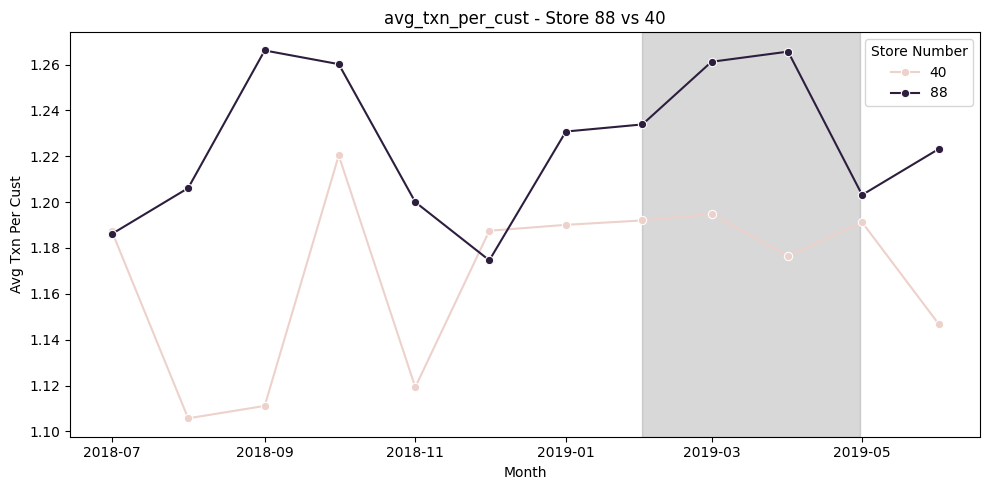

In [ ]:
# For Store 88 vs Control 178
for metric in ['total_sales', 'num_customers', 'avg_txn_per_cust']:
    plot_metric(88, 40, metric)


---

### 🏪 **Store 88 vs Control Store 40**
**Trial period performance (Feb to Apr 2019):**
- **Total Sales:**  
  Uplift = **+10.43%**  
  ⟶ Strong increase in sales, suggesting the trial had a **positive impact**.

- **Number of Customers:**  
  Uplift = **+6.63%**  
  ⟶ Good increase in footfall — **more customers visited the store**.

- **Average Transactions per Customer:**  
  Uplift = **+5.54%**  
  ⟶ Customers also shopped **more actively**, not just more people coming in.

**📊 Visual Insight:**
- Clear divergence during the trial — Store 88 outperformed Store 40 consistently in all three metrics.
- The post-trial trend also shows sustained higher values.

**📝 Conclusion:**
> **Store 88’s trial campaign was successful**, showing significant growth in **sales, customer count, and transaction frequency**. This store is a **strong candidate for scaling the strategy**.

---

### ✅ Overall Recommendation:
- ✅ **Proceed with full-scale rollout at Store 88** and similar stores based on its strong uplift across all key metrics.
- ⚠️ **Do not scale to Store 86-like locations yet** — trial impact was minimal and may not justify rollout costs.




---

## 🧠 **Final Insights – Experimentation and Uplift Testing**

As part of the marketing trial, campaigns were conducted in **Stores 77, 86, and 88**, with carefully selected **control stores** to evaluate performance differences during the trial period (**Feb–Apr 2019**). Key performance indicators—**Total Sales**, **Number of Customers**, and **Average Transactions per Customer**—were analyzed to assess the success of the campaign strategies.

---

### 🔍 **Trial Store 77 vs Control Store 46**

During the trial period, Store 77 demonstrated a **moderate uplift in performance** when compared to Control Store 46.

- **Total Sales**: **+4.77% uplift**
- **Number of Customers**: **+12.70% uplift**
- **Average Transactions per Customer**: **+2.59% uplift**

**Interpretation**:  
Store 77 experienced a **noticeable rise in customer visits**, likely due to improvements in store layout, promotions, or other trial interventions. The modest uplift in sales, accompanied by stable purchasing behavior per customer, suggests that **increased traffic** was the main contributor to improved performance.

✅ **Recommendation**:  
The trial at Store 77 was **marginally successful**, with the most notable impact on **customer attraction**. While sales growth was moderate, the consistent increase in footfall supports **expanding similar initiatives** to other stores aiming to boost traffic.

---

### 🔍 **Trial Store 86 vs Control Store 229**

- **Total Sales**: **+0.51% uplift**
- **Number of Customers**: **+4.47% uplift**
- **Average Transactions per Customer**: **-1.37% decline**

**Interpretation**:  
Store 86 showed **only minor gains**, with a slight increase in customer count and negligible impact on total sales. A small drop in transactions per customer indicates that **the campaign did not significantly influence purchasing behavior**.

⚠️ **Recommendation**:  
Results from Store 86 were **not compelling enough** for full-scale rollout. Consider **revisiting the campaign strategy** or conducting further testing with more tailored promotions or layout optimizations before expansion.

---

### 🔍 **Trial Store 88 vs Control Store 40**

- **Total Sales**: **+10.43% uplift**
- **Number of Customers**: **+6.63% uplift**
- **Average Transactions per Customer**: **+5.54% uplift**

**Interpretation**:  
Store 88 showed a **strong and well-rounded improvement** across all key metrics. Increased traffic and enhanced customer engagement led to the **highest uplift** among the trial stores.

✅ **Recommendation**:  
Store 88's trial was **highly successful** and supports immediate **rollout to similar high-potential stores**. The marketing strategy here can serve as a reference model for future campaigns.

---

### 📌 **Overall Conclusion**

- All trial stores experienced **some level of uplift**, with **Store 88 showing the most promising results**.
- **Customer footfall** was the main contributor to sales growth in Stores 77 and 86, while **Store 88 also improved customer engagement**.
- Results support that **trial interventions had varying levels of impact**, emphasizing the importance of **store-specific strategy adaptation**.

📢 **Final Recommendation**:  
Proceed with a **phased rollout**, prioritizing **stores with profiles similar to Store 88**. For **Store 77**, expand to additional traffic-focused stores. Reassess and enhance strategies before rolling out changes to **stores like 86**. Include **continuous performance tracking and A/B testing** for optimization.

---
